In [2]:
import json
import os
import pandas as pd
import numpy as np

In [19]:
# img = '000000.png' 
# img_id = 534600936
# head = [85.56447, 24.732826]
# eye_r = [77.036545, 61.643562]
# eye_l = [88.15402, 62.289528]
# neck = [87.04971, 83.33402] 

img_id = []
head = [] 

f = open('C:/Users/user/Desktop/models/vitpose/20221015/result_keypoints.txt', 'r')
    # print(f)
while True:
    line = f.readline()
    if not line: break 
    img_id_axis = line.split('//')[1].replace(' ', '')
    img_id.append(int(img_id_axis))
    head_axis = line.split('//')[2].split('],')[0].replace('[', '').replace(' ', '').split(',')
    head.append([head_axis[0], head_axis[1]])
    
f.close() 

# head, img_id
# img_id

In [20]:
def calc_distance(arr1, arr2):
    arr1 = np.array(arr1, dtype=float)
    arr2 = np.array(arr2, dtype=float)
    
    return np.linalg.norm(arr1 - arr2)

In [5]:
path = 'E:/22.9.21/GM/openpose/custom_dataset/annotations'
# paths = ['train', 'test', 'valid']
paths = os.path.join(path, 'test_baby_keypoints.json')

# coco = [] 
# for p in paths:
#     valid_path = os.path.join(path, f'{p}_baby_keypoints.json')
    
with open(paths, 'r') as f:
    json_data = json.load(f)
        

In [26]:
pchk_list = []
# idx = - 
for ii in range(100):     
    ii = (ii + 1) / 100
    pckh = 0 
    total = 0 
    for ann in json_data['annotations']:
        idx = img_id.index(ann['image_id'])
        
        thr = calc_distance([ann['keypoints'][0], ann['keypoints'][1]], [ann['keypoints'][9], ann['keypoints'][10]]) * ii
        # print(thr / 2)
        dist = calc_distance(head[idx], [ann['keypoints'][0], ann['keypoints'][1]])
        
        if dist <= thr:
            pckh += 1
            
        total += 1
        
    
        
        # coco_data = {}
        # /print(f"------------------->{ann['image_id']}")
        # print(f"'------------------->{ann['bbox']}")
        
        # coco_data['bbox'] = ann['bbox']
        # coco_data['category_id'] = ann['category_id']
        # coco_data['image_id'] = ann['image_id']
        # coco_data['score'] = 1
        
        # coco.append(coco_data)
        # if img_id == ann['image_id']:
        # print(f"'------------------->{ann['keypoints']}")
        # print(f"head : {calc_distance(head, [ann['keypoints'][0], ann['keypoints'][1]])}")
        # print(f"eye_r : {calc_distance(eye_r, [ann['keypoints'][3], ann['keypoints'][4]])}")
        # print(f"eye_l : {calc_distance(eye_l, [ann['keypoints'][6], ann['keypoints'][7]])}")
        # print(f"neck : {calc_distance(neck, [ann['keypoints'][9], ann['keypoints'][10]])}")
    pchk_list.append(pckh / total * 100)            
    print(f'{ii} threhold : {pckh / total * 100}')


0.01 threhold : 5.177228786251343
0.02 threhold : 14.52201933404941
0.03 threhold : 24.146079484425346
0.04 threhold : 33.77013963480129
0.05 threhold : 41.997851772287866
0.06 threhold : 49.23737916219119
0.07 threhold : 55.85392051557465
0.08 threhold : 61.568206229860365
0.09 threhold : 65.77873254564985
0.1 threhold : 69.49516648764768
0.11 threhold : 72.73899033297529
0.12 threhold : 76.00429645542427
0.13 threhold : 78.34586466165413
0.14 threhold : 80.90225563909775
0.15 threhold : 83.05048335123523
0.16 threhold : 85.06981740064447
0.17 threhold : 86.61654135338345
0.18 threhold : 87.9484425349087
0.19 threhold : 89.30182599355531
0.2 threhold : 90.37593984962406
0.21 threhold : 91.1922663802363
0.22 threhold : 91.94414607948443
0.23 threhold : 92.43823845327604
0.24 threhold : 92.69602577873255
0.25 threhold : 92.9967776584318
0.26 threhold : 93.27604726100967
0.27 threhold : 93.72717508055854
0.28 threhold : 94.07089151450053
0.29 threhold : 94.30719656283566
0.3 threhold : 9

In [27]:
len(pchk_list)

100

Text(0.5, 0, 'N')

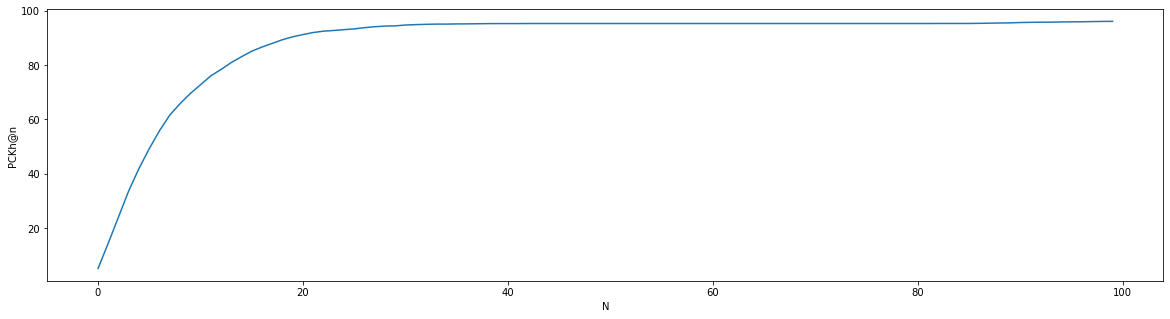

In [32]:
import matplotlib.pyplot as plt
# pchk_list
plt.figure(figsize=(20, 5))
plt.plot(range(100), pchk_list)
plt.ylabel('PCKh@n')
plt.xlabel('N')

In [9]:
path = 'C:/Users/user/Desktop/models/vitpose/20221015'
logs = os.path.join(path, '20221014_104238.log.json')

data = [] 
# with open(logs, 'r') as f:
#     data.append(json.load(f))
    
# data    
for j in open(logs, 'r'):
    data.append(json.loads(j))
    
# data

In [32]:
# data =[] 
# data[1]

# {'mode': 'train', 'epoch': 1, 'iter': 850, 'lr': 1e-05, 'memory': 4046, 'data_time': 0.00042, 'heatmap_loss': 0.00148, 'acc_pose': 0.7301, 'loss': 0.00148, 'grad_norm': 0.00872, 'time': 0.10553}

# {"mode": "val", "epoch": 60, "iter": 609, "lr": 1e-05, "AP": 0.9742, "AP .5": 1.0, "AP .75": 0.98993, "AP (M)": -1.0, "AP (L)": 0.9742, "AR": 0.97719, "AR .5": 1.0, "AR .75": 0.99384, "AR (M)": -1.0, "AR (L)": 0.97719}



heatmap_loss = []
acc_pose = [] 
loss = [] 
grad_norm = []


ap = []
ap_5 = []
ap_75 = [] 
ap_m = [] 
ap_l = [] 

ar = [] 
ar_5 = [] 
ar_75 = [] 
ar_m = [] 
ar_l = [] 

for ii in range(1, len(data)-1):
    # print(data[ii])
    # ii_data = data[ii]
    # print(ii_data[ii_data['mode'] == 'train']['mode'])
    if data[ii]['mode'] == 'train':
        # print(1)
        if data[ii]['iter'] >= 850:
            # print(data[ii]['epoch'], ' Epoch')
            heatmap_loss.append(data[ii]['heatmap_loss'])
            acc_pose.append(data[ii]['acc_pose'])
            loss.append(data[ii]['loss'])
            grad_norm.append(data[ii]['grad_norm'])
            
    elif data[ii]['mode'] == 'val':
        ap.append(data[ii]['AP'])
        ap_5.append(data[ii]['AP .5'])
        ap_75.append(data[ii]['AP .75']) 
        ap_m.append(data[ii]['AP (M)']) 
        ap_l.append(data[ii]['AP (L)']) 

        ar.append(data[ii]['AR']) 
        ar_5.append(data[ii]['AR .5']) 
        ar_75.append(data[ii]['AR .75']) 
        ar_m.append(data[ii]['AR (M)']) 
        ar_l.append(data[ii]['AR (L)']) 

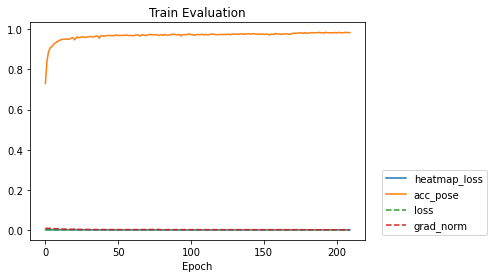

In [41]:
import matplotlib.pyplot as plt

# heatmap_loss = []
# acc_pose = [] 
# loss = [] 
# grad_norm = [] 

plt.plot(heatmap_loss, label='heatmap_loss')
plt.plot(acc_pose, label='acc_pose')
plt.plot(loss, '--', label='loss')
plt.plot(grad_norm, '--', label='grad_norm')
plt.legend(loc=(1.05, 0.02))
plt.title('Train Evaluation')
plt.xlabel('Epoch')
plt.show()

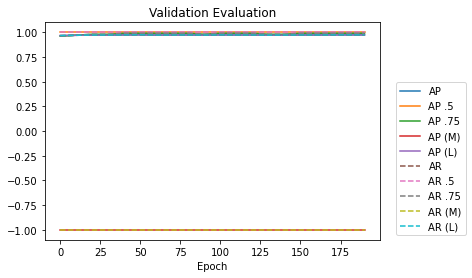

In [42]:
x_axis = range(0, len(ap) * 10, 10)
plt.plot(x_axis, ap, label='AP')
plt.plot(x_axis, ap_5, label='AP .5')
plt.plot(x_axis, ap_75, label='AP .75')
plt.plot(x_axis, ap_m, label='AP (M)')
plt.plot(x_axis, ap_l, label='AP (L)')

plt.plot(x_axis, ap, '--', label='AR')
plt.plot(x_axis, ap_5, '--', label='AR .5')
plt.plot(x_axis, ap_75, '--', label='AR .75')
plt.plot(x_axis, ap_m, '--', label='AR (M)')
plt.plot(x_axis, ap_l, '--', label='AR (L)')


plt.legend(loc=(1.05, 0.02))
plt.title('Validation Evaluation')
plt.xlabel('Epoch')
# plt.ylabel('Epoch')
plt.show()